In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import seaborn as sns
import os

working_directory = os.getcwd()
print(working_directory)

/Users/zichang


In [110]:
# Download necessary nltk data
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("vader_lexicon")
nltk.download('punkt_tab')
nltk.download("averaged_perceptron_tagger")
nltk.download('averaged_perceptron_tagger_eng')
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to /Users/zichang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zichang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zichang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/zichang/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/zichang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/zichang/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [112]:
# Load the dataset
file_path = working_directory + '/Desktop/sentiment_data.csv'  # Update this path as needed
df = pd.read_csv(file_path)

In [114]:
# Display basic information
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241145 entries, 0 to 241144
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  241145 non-null  int64 
 1   Comment     240928 non-null  object
 2   Sentiment   241145 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.5+ MB
None


In [116]:
# Show summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
          Unnamed: 0      Sentiment
count  241145.000000  241145.000000
mean   121289.252479       1.198822
std     69709.762092       0.785110
min         0.000000       0.000000
25%     61063.000000       1.000000
50%    121350.000000       1.000000
75%    181636.000000       2.000000
max    241925.000000       2.000000


In [118]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0      0
Comment       217
Sentiment       0
dtype: int64


In [120]:
# Value counts for sentiment column
print("\nSentiment Distribution:")
print(df["Sentiment"].value_counts())


Sentiment Distribution:
Sentiment
2    103059
1     82972
0     55114
Name: count, dtype: int64


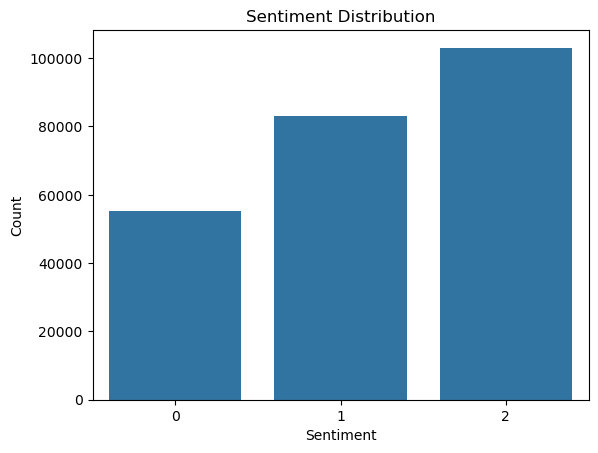

In [122]:
# Visualize sentiment distribution
sns.countplot(x="Sentiment", data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

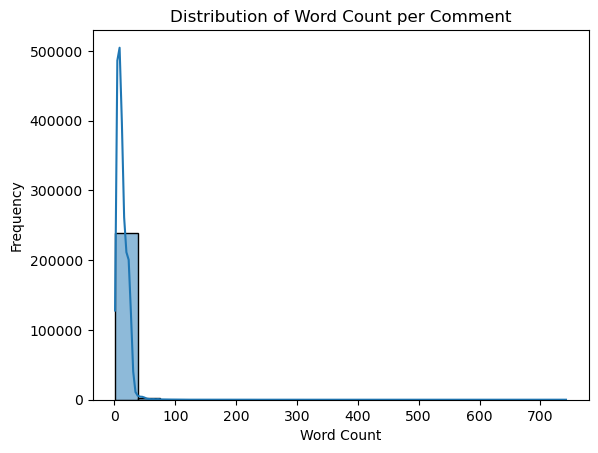

In [124]:
# Word count per comment (basic text analysis)
df["Word_Count"] = df["Comment"].apply(lambda x: len(str(x).split()))
sns.histplot(df["Word_Count"], bins=20, kde=True)
plt.title("Distribution of Word Count per Comment")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [126]:
# Display the first few rows
print("\nSample Data:")
print(df.head())


Sample Data:
   Unnamed: 0                                            Comment  Sentiment  \
0           0  lets forget apple pay required brand new iphon...          1   
1           1  nz retailers don’t even contactless credit car...          0   
2           2  forever acknowledge channel help lessons ideas...          2   
3           3  whenever go place doesn’t take apple pay doesn...          0   
4           4  apple pay convenient secure easy use used kore...          2   

   Word_Count  
0          33  
1          18  
2          15  
3          49  
4          14  


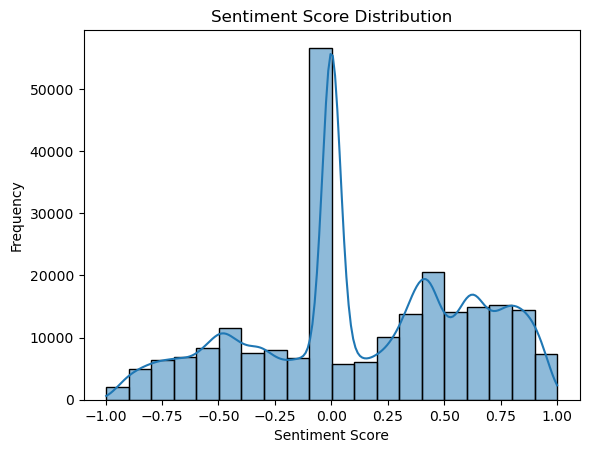

In [128]:
# Tokenization and stopword removal
def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())  # Tokenization
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

df["Processed_Comment"] = df["Comment"].apply(preprocess_text)

# Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()
df["Sentiment_Score"] = df["Processed_Comment"].apply(lambda x: sia.polarity_scores(x)["compound"])

# Visualizing sentiment distribution
sns.histplot(df["Sentiment_Score"], bins=20, kde=True)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

In [129]:
# Named Entity Recognition (NER) using nltk's POS tagging (Proper Nouns)
def extract_named_entities(text):
    tokens = word_tokenize(str(text))
    pos_tags = nltk.pos_tag(tokens)
    named_entities = [word for word, tag in pos_tags if tag in ["NNP", "NNPS"]]  # Extract proper nouns
    return named_entities

df["Named_Entities"] = df["Comment"].apply(extract_named_entities)

# Word Frequency Analysis using CountVectorizer
vectorizer = CountVectorizer(stop_words="english")
word_count_matrix = vectorizer.fit_transform(df["Processed_Comment"])
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_count_matrix.sum(axis=0).A1))
common_words = Counter(word_freq).most_common(10)

print("\nMost Common Words:")
print(common_words)

# Display sample results
print("\nSample Data with NLP Features:")
print(df[["Comment", "Sentiment_Score", "Named_Entities"]].head())


Most Common Words:
[('modi', np.int64(149679)), ('india', np.int64(27735)), ('like', np.int64(18955)), ('people', np.int64(15672)), ('bjp', np.int64(14149)), ('congress', np.int64(12435)), ('dont', np.int64(12094)), ('time', np.int64(11561)), ('narendra', np.int64(11344)), ('good', np.int64(10571))]

Sample Data with NLP Features:
                                             Comment  Sentiment_Score  \
0  lets forget apple pay required brand new iphon...           0.4588   
1  nz retailers don’t even contactless credit car...           0.8360   
2  forever acknowledge channel help lessons ideas...           0.8718   
3  whenever go place doesn’t take apple pay doesn...          -0.8720   
4  apple pay convenient secure easy use used kore...           0.7579   

  Named_Entities  
0             []  
1            [’]  
2             []  
3   [’, ‘, ’, ’]  
4             []  
